# 🧪 Quantitative CT Calibration 

This notebook demonstrates how to use the `ogoImageCalibration` tool to apply **internal calibration** to a clinical CT image.

We will:

- Apply internal calibration using a `.txt` file with precomputed parameters.
- Visualize the input image and the calibrated output.
- Plot histograms of HU (raw CT) vs. calibrated density (mg/cc).

📌 **Dataset:** We are using a sample image from the VERSE dataset: `sub-verse004_0000.nii.gz` available at [OSF.io/nqjyw](https://osf.io/nqjyw/).

---

## 🛠️ Command Line Alternative

If you're working outside of a notebook environment or want to automate the process using shell scripts, you can run the calibration script directly via the command line using the built-in `argparse` interface.

Below is an example using the same input as in this notebook:

### 🧪 Example: Reapplying Internal Calibration from `.txt` (sub-verse004)

```bash
python ogoImageCalibration.py internal \
  ../../RAW_IMAGES/sub-verse004_0000.nii.gz \
  ../data/calibration_files/sub-verse004_0000.txt \
  ../../RAW_IMAGES/sub-verse004_0000_calibrated.nii.gz \


In [1]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np
import os

from ogo.cli.ImageCalibration import internal

In [2]:
# Input and output paths (adjust if needed)
input_image = "../../RAW_IMAGES/sub-verse004_0000.nii.gz"  # Original image
calib_txt = "../data/calibration_files/sub-verse004_0000.txt"  # Calibration file
output_image = "../../RAW_IMAGES/sub-verse004_0000_calibrated.nii.gz"  # Calibrated image

# Apply calibration
internal(
    input_image=input_image,
    input_mask=calib_txt,  # providing .txt automatically triggers reapplication
    output_image=output_image,
    calib_file_name=None,
    useLabels=[],  
    corticalbone=1,
    tissue_checks=True,
    output_arch_image=True,
    overwrite=True,
    func=None  
)

    0.19 Starting internal calibration.
    0.19 Reading input CT image to be calibrated:
    0.19       "../../RAW_IMAGES/sub-verse004_0000.nii.gz"
    0.31 Detected calibration file as input. Reapplying calibration directly from txt.
Calibrated image saved to ../../RAW_IMAGES/sub-verse004_0000_calibrated.nii.gz
    2.19 Done internal calibration.


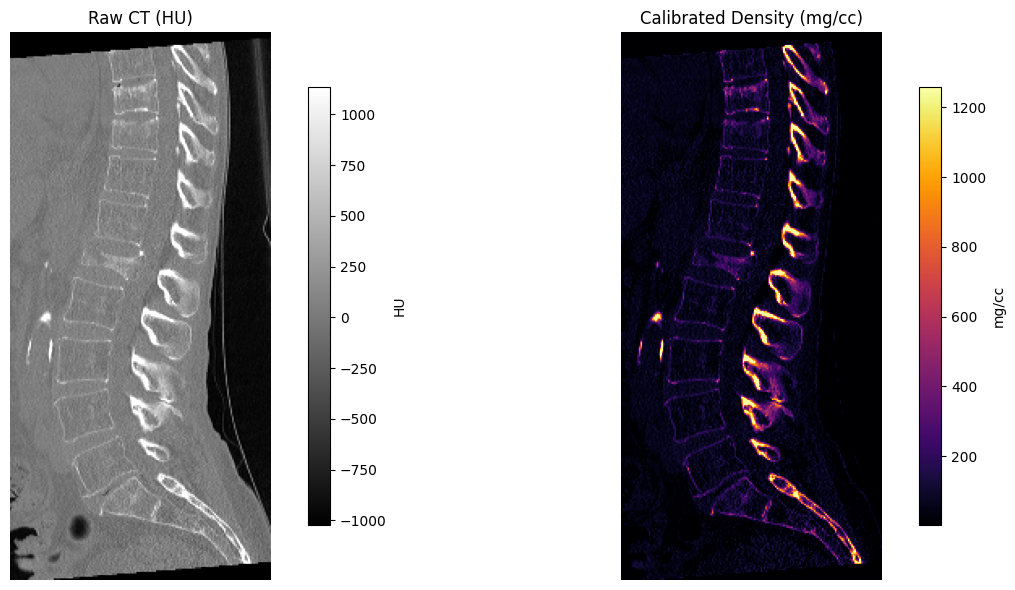

In [3]:

# Load images
raw = sitk.ReadImage(input_image)
cal = sitk.ReadImage(output_image)

raw_arr = sitk.GetArrayFromImage(raw)
cal_arr = sitk.GetArrayFromImage(cal)

# Get mid-slice
mid = raw_arr.shape[0] // 2
raw_slice = raw_arr[mid, :, :]
cal_slice = cal_arr[mid, :, :]

# Optional: Clip extreme values for better visualization
raw_vmin, raw_vmax = np.percentile(raw_slice, [1, 99])
cal_vmin, cal_vmax = np.percentile(cal_slice[cal_slice > 0], [1, 99])  # exclude zeros

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Raw CT (HU)
im0 = axs[0].imshow(raw_slice, cmap='gray', vmin=raw_vmin, vmax=raw_vmax)
axs[0].set_title('Raw CT (HU)')
axs[0].axis('off')
cbar0 = fig.colorbar(im0, ax=axs[0], shrink=0.8)
cbar0.set_label('HU')

# Calibrated Density (mg/cc)
im1 = axs[1].imshow(cal_slice, cmap='inferno', vmin=cal_vmin, vmax=cal_vmax)
axs[1].set_title('Calibrated Density (mg/cc)')
axs[1].axis('off')
cbar1 = fig.colorbar(im1, ax=axs[1], shrink=0.8)
cbar1.set_label('mg/cc')

plt.tight_layout()
plt.show()

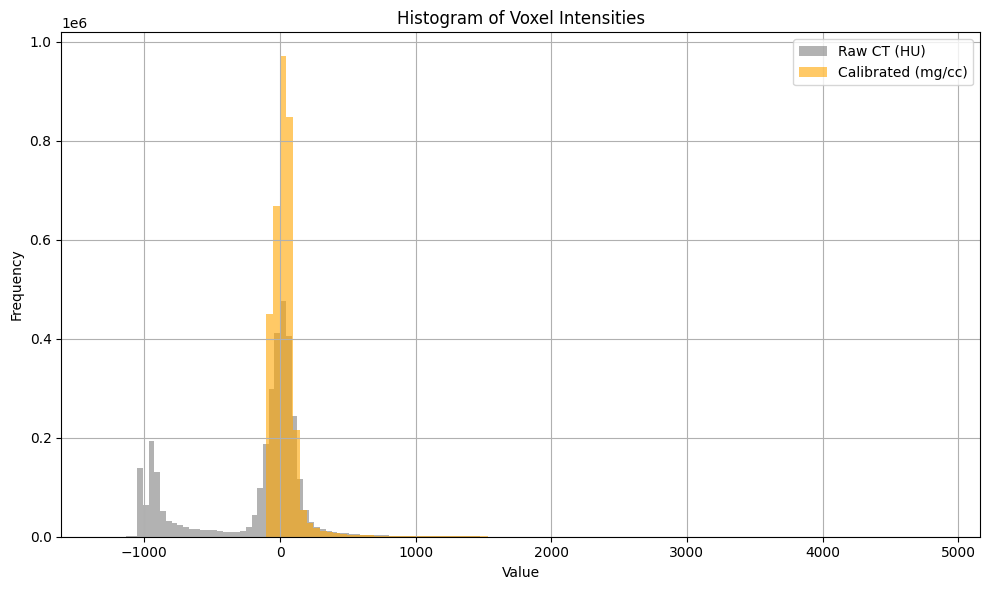

In [4]:
# Plot histogram 
raw_vals = raw_arr.flatten()
cal_vals = cal_arr.flatten()

plt.figure(figsize=(10, 6))
plt.hist(raw_vals, bins=100, alpha=0.6, label="Raw CT (HU)", color="gray")
plt.hist(cal_vals, bins=100, alpha=0.6, label="Calibrated (mg/cc)", color="orange")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.title("Histogram of Voxel Intensities")
plt.grid(True)
plt.tight_layout()
plt.show()

✅ **Summary**

- The internal calibration was successfully applied using the precomputed `.txt` file.
- The calibrated output image now expresses **K2HPO4-equivalent density in mg/cc**.
- This enables quantitative analysis of bone mineral density from routine CT scans.

🧠 *Try loading a few more subjects to compare variations in calibration across individuals!*